In [97]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import plotly.express as px

In [3]:
data = pd.read_csv(r"C:\Users\ASUS\Documents\datasets for visulaization\loan.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              61 non-null     int64 
 1   gender           61 non-null     object
 2   occupation       61 non-null     object
 3   education_level  61 non-null     object
 4   marital_status   61 non-null     object
 5   income           61 non-null     int64 
 6   credit_score     61 non-null     int64 
 7   loan_status      61 non-null     object
dtypes: int64(3), object(5)
memory usage: 3.9+ KB


In [5]:
data.head()

age  gender  occupation education_level marital_status  income  \
0   32    Male    Engineer      Bachelor's        Married   85000   
1   45  Female     Teacher        Master's         Single   62000   
2   28    Male     Student     High School         Single   25000   
3   51  Female     Manager      Bachelor's        Married  105000   
4   36    Male  Accountant      Bachelor's        Married   75000   

   credit_score loan_status  
0           720    Approved  
1           680    Approved  
2           590      Denied  
3           780    Approved  
4           710    Approved

In [7]:
data.shape

(61, 8)

In [11]:
data.isnull().sum(0)

age                0
gender             0
occupation         0
education_level    0
marital_status     0
income             0
credit_score       0
loan_status        0
dtype: int64

In [13]:
data.describe()

age         income  credit_score
count  61.000000      61.000000     61.000000
mean   37.081967   78983.606557    709.836066
std     8.424755   33772.025802     72.674888
min    24.000000   25000.000000    560.000000
25%    30.000000   52000.000000    650.000000
50%    36.000000   78000.000000    720.000000
75%    43.000000   98000.000000    770.000000
max    55.000000  180000.000000    830.000000

In [15]:
male = data[data.gender=="Male"]
female = data[data.gender=="Female"]
print(f"male : {male.shape}")
print(f"female : {female.shape}")

male : (31, 8)
female : (30, 8)


In [17]:
approved_loan = data[data.loan_status=="Approved"]
denied_loan = data[data.loan_status=="Denied"]
print(f"approved_loan : {approved_loan.shape}")
print(f"denied_loan : {denied_loan.shape}")

approved_loan : (45, 8)
denied_loan : (16, 8)


In [59]:
approvedloan = data[data['loan_status']=='Approved'].groupby('occupation')['occupation'].value_counts()
approvedloan_data=approvedloan.reset_index()
approvedloan_data

occupation  count
0     Accountant      2
1        Analyst      2
2      Architect      2
3         Banker      2
4           Chef      2
5     Consultant      2
6        Dentist      1
7         Doctor      2
8         Editor      1
9    Electrician      1
10      Engineer      5
11            HR      1
12            IT      2
13        Lawyer      2
14       Manager      2
15     Marketing      2
16    Pharmacist      1
17         Pilot      1
18     Professor      2
19    Programmer      1
20  Psychologist      1
21       Realtor      1
22    Researcher      1
23         Sales      1
24      Software      1
25       Teacher      2
26  Veterinarian      1
27        Writer      1

In [53]:
deniedloan = data[data['loan_status']=='Denied'].groupby('occupation')['occupation'].value_counts()
deniedloan_data=deniedloan.reset_index()
deniedloan_data

occupation  count
0         Artist      2
1       Designer      2
2       Musician      1
3          Nurse      2
4   Photographer      1
5   Receptionist      2
6       Salesman      2
7         Server      1
8        Student      1
9        Stylist      1
10        Writer      1

In [45]:
loan_approval_by_gender = data[data['loan_status']=="Approved"].groupby('gender')['gender'].value_counts()
loan_approval_by_gender_data =loan_approval_by_gender.reset_index()
loan_approval_by_gender_data

gender  count
0  Female     19
1    Male     26

In [55]:

loan_denied_by_gender = data[data['loan_status']=="Denied"].groupby('gender')['gender'].value_counts()
loan_denied_by_gender_data =loan_denied_by_gender.reset_index()
loan_denied_by_gender_data

gender  count
0  Female     11
1    Male      5

In [61]:
data['education_level'].unique()

array(["Bachelor's", "Master's", 'High School', "Associate's", 'Doctoral'],
      dtype=object)

In [67]:
loan_approved_by_education_level = data[data['loan_status']=='Approved'].groupby('education_level')['education_level'].value_counts()
loan_approved_by_education_level_data = loan_approved_by_education_level.reset_index()
loan_approved_by_education_level

education_level
Associate's     2
Bachelor's     17
Doctoral       10
High School     1
Master's       15
Name: count, dtype: int64

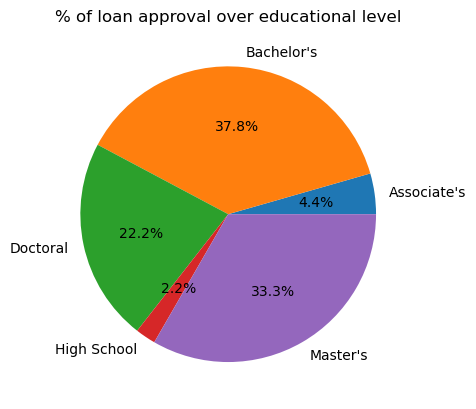

In [69]:
plt.pie(loan_approved_by_education_level,labels=loan_approved_by_education_level.index,autopct='%0.1f%%')
plt.title('% of loan approval over educational level')
plt.show()

Text(0, 0.5, 'number of loan approved')

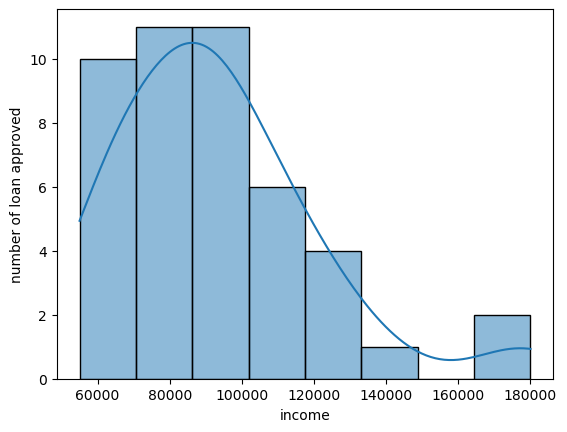

In [71]:
sns.histplot(data[data['loan_status']=='Approved'].income,kde=True)
plt.xlabel('income')
plt.ylabel('number of loan approved')

Text(0, 0.5, 'number of loan Denied')

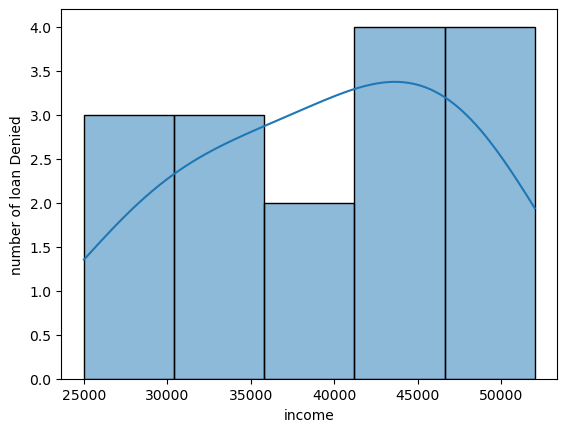

In [73]:
sns.histplot(data[data['loan_status']=='Denied'].income,kde=True)
plt.xlabel('income')
plt.ylabel('number of loan Denied')

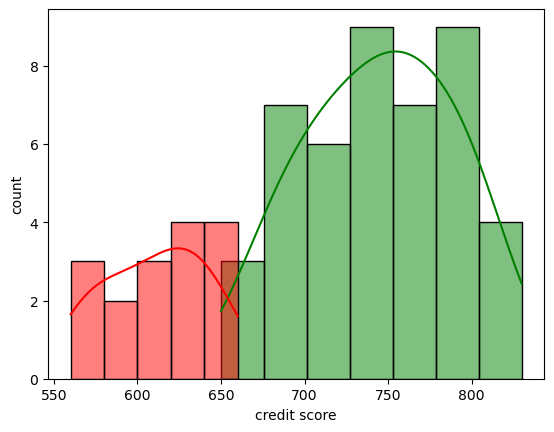

In [75]:
sns.histplot(data[data['loan_status']=='Approved'].credit_score,kde=True,color='green',label='approved')
sns.histplot(data[data['loan_status']=='Denied'].credit_score,kde=True,color='red',label='denied')
plt.xlabel('credit score')
plt.ylabel('count')
plt.show()

In [77]:
def change_val(x):
    if x=='Approved':
        return 1
    else:
        return 0

data['loan_status']=data['loan_status'].apply(change_val)
data.head()

age  gender  occupation education_level marital_status  income  \
0   32    Male    Engineer      Bachelor's        Married   85000   
1   45  Female     Teacher        Master's         Single   62000   
2   28    Male     Student     High School         Single   25000   
3   51  Female     Manager      Bachelor's        Married  105000   
4   36    Male  Accountant      Bachelor's        Married   75000   

   credit_score  loan_status  
0           720            1  
1           680            1  
2           590            0  
3           780            1  
4           710            1

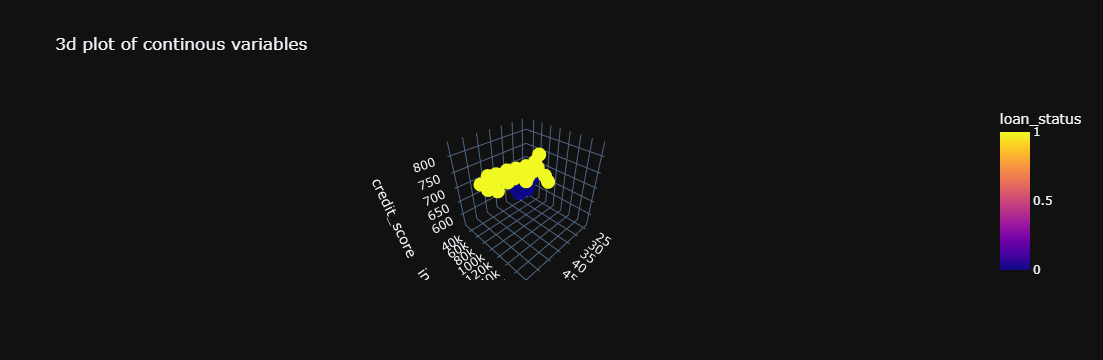

In [107]:

ax = px.scatter_3d(data,x='age',y='income',z='credit_score',template='plotly_dark',color='loan_status',title='3d plot of continous variables')
ax.show()

In [114]:
data_copy = data.copy()
data_copy.head()
data_1 = pd.get_dummies(data_copy,columns=['gender','occupation','education_level','marital_status','loan_status'],dtype=int)
data_1.head()

age  income  credit_score  gender_Female  gender_Male  \
0   32   85000           720              0            1   
1   45   62000           680              1            0   
2   28   25000           590              0            1   
3   51  105000           780              1            0   
4   36   75000           710              0            1   

   occupation_Accountant  occupation_Analyst  occupation_Architect  \
0                      0                   0                     0   
1                      0                   0                     0   
2                      0                   0                     0   
3                      0                   0                     0   
4                      1                   0                     0   

   occupation_Artist  occupation_Banker  ...  occupation_Writer  \
0                  0                  0  ...                  0   
1                  0                  0  ...                  0   
2                  0                  0  ...                  0   
3                  0                  0  ...                  0   
4                  0                  0  ...                  0   

   education_level_Associate's  education_level_Bachelor's  \
0                            0                           1   
1                            0                           0   
2                            0                           0   
3                            0                           1   
4                            0                           1   

   education_level_Doctoral  education_level_High School  \
0                         0                            0   
1                         0                            0   
2                         0                            1   
3                         0                            0   
4                         0                            0   

   education_level_Master's  marital_status_Married  marital_status_Single  \
0                         0                       1                      0   
1                         1                       0                      1   
2                         0                       0                      1   
3                         0                       1                      0   
4                         0                       1                      0   

   loan_status_0  loan_status_1  
0              0              1  
1              0              1  
2              1              0  
3              0              1  
4              0              1  

[5 rows x 52 columns]

<Axes: >

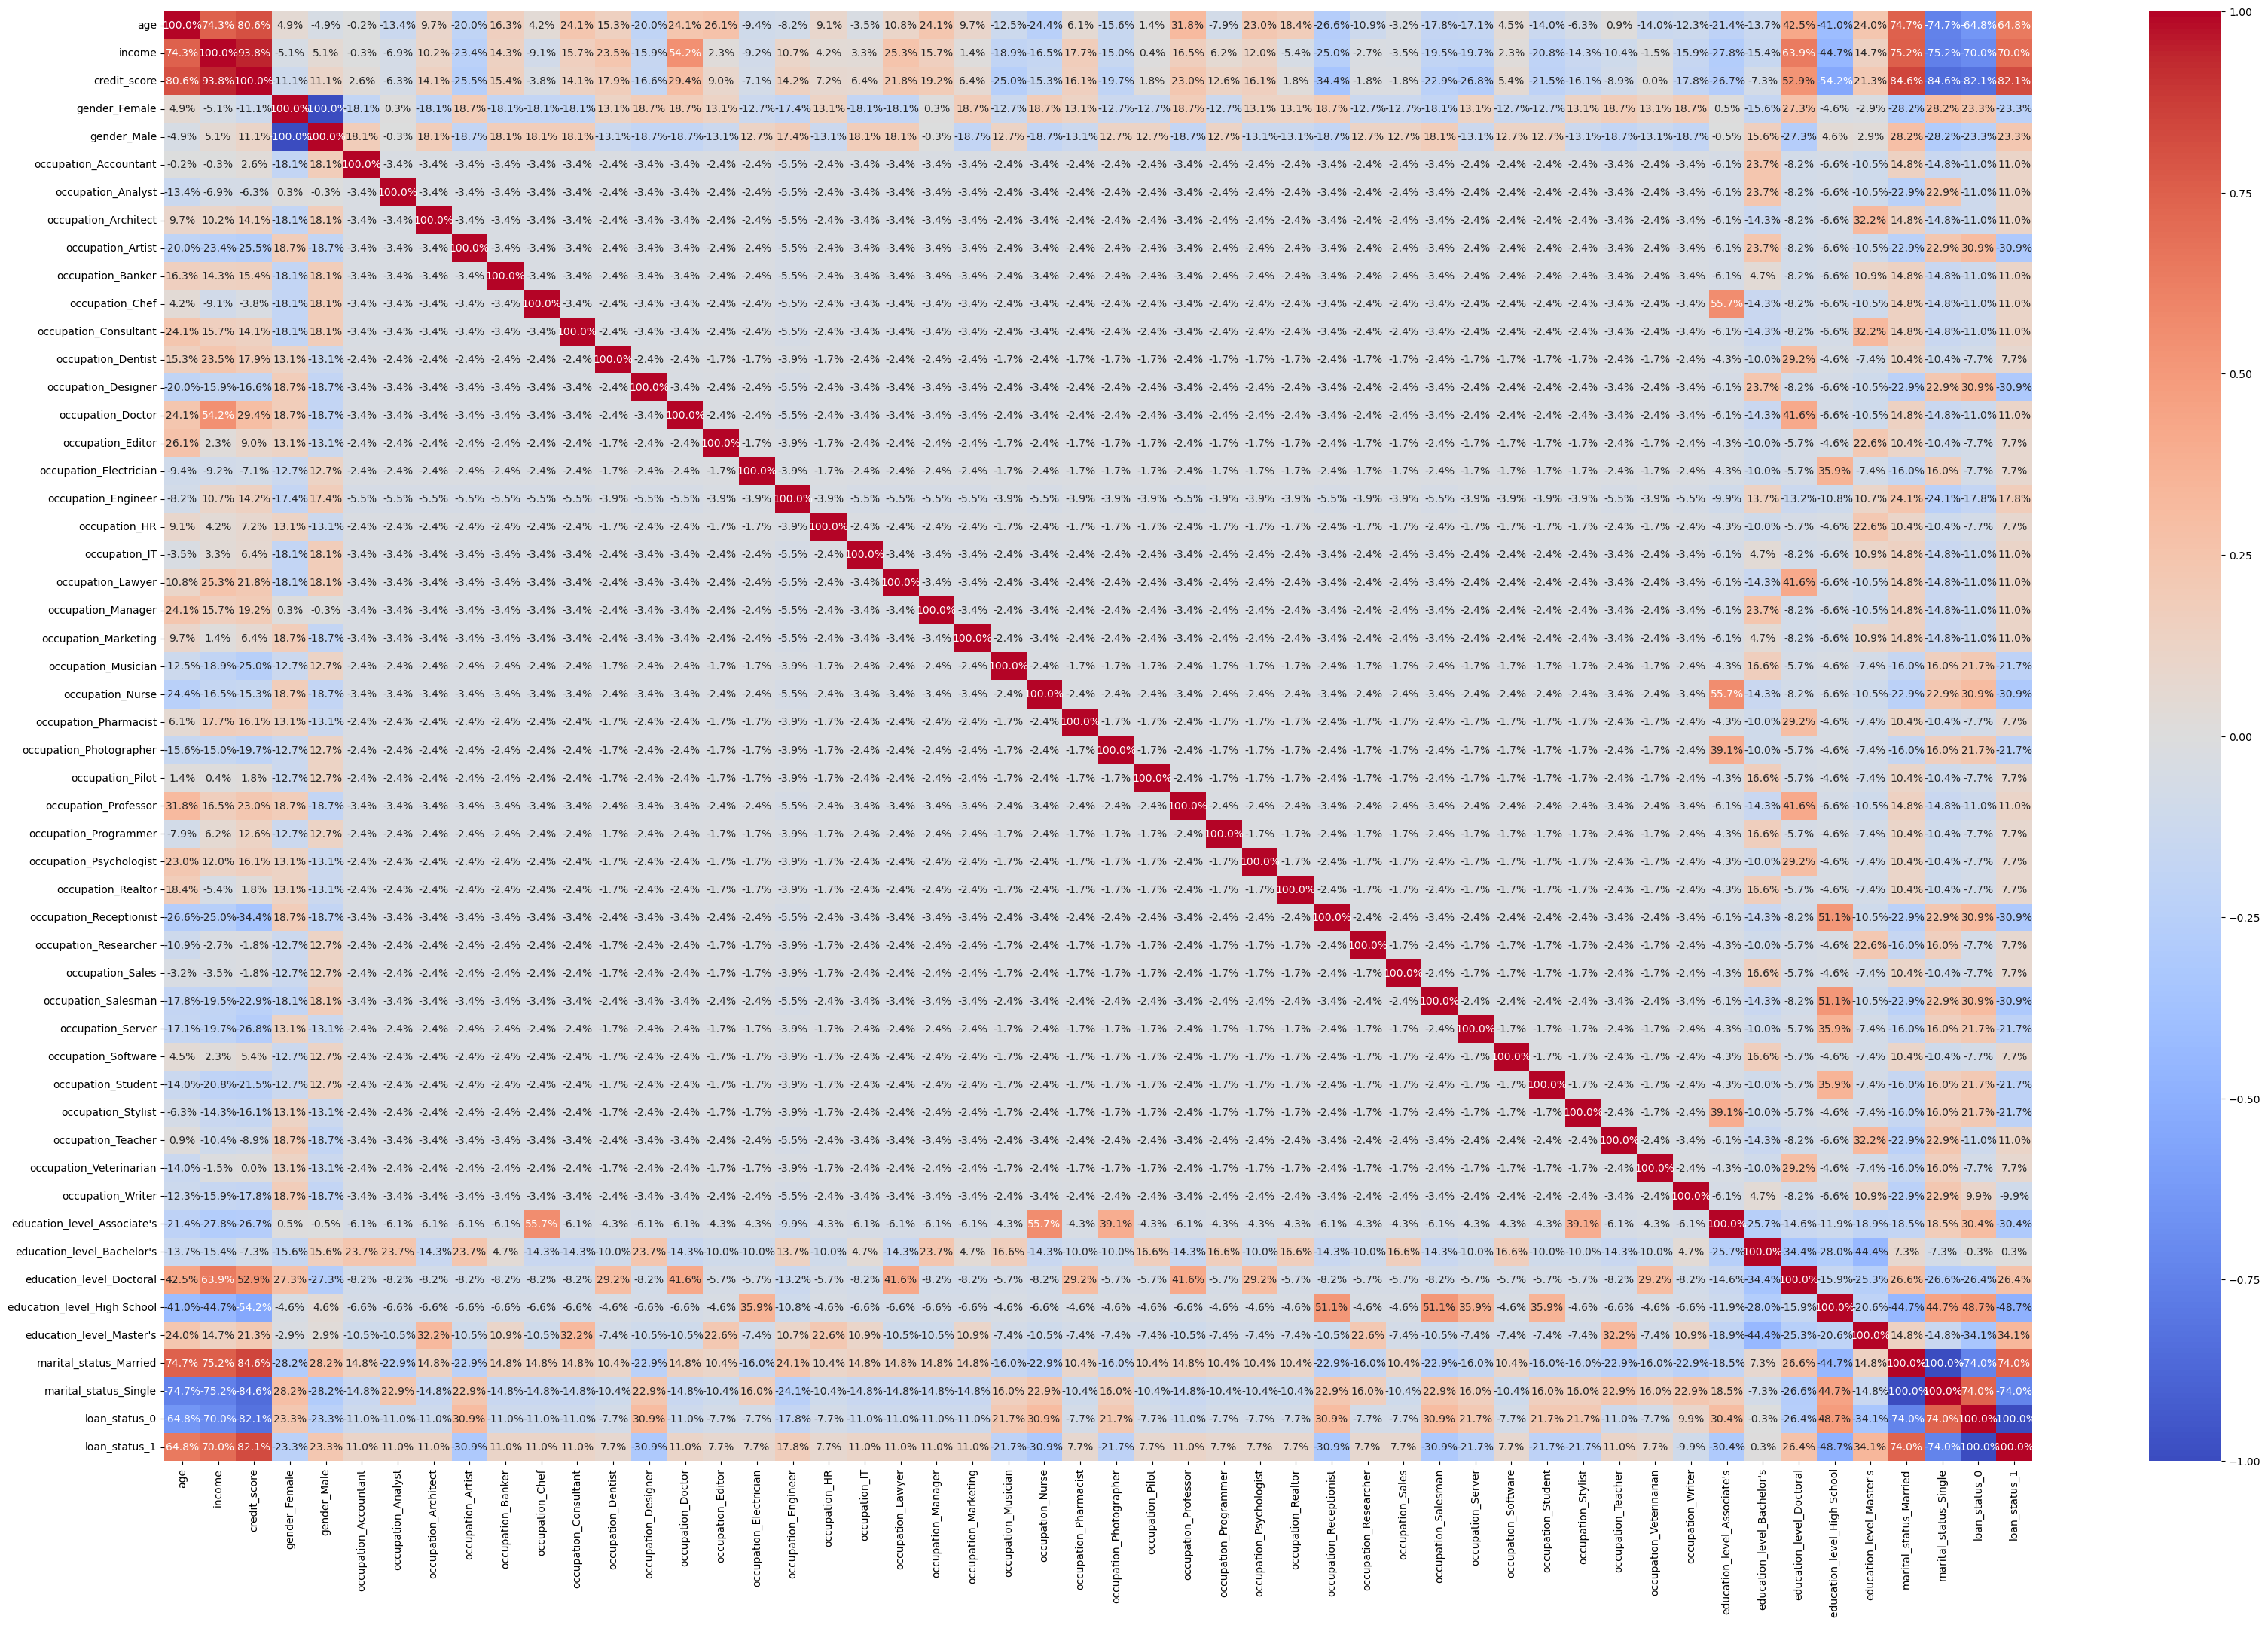

In [118]:
plt.figure(figsize=(40,25))
sns.heatmap(data_1.corr(),annot=True,cmap='coolwarm',fmt='.1%')